<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

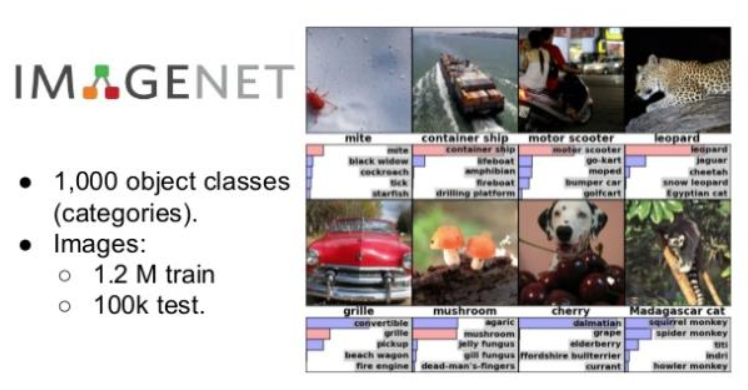

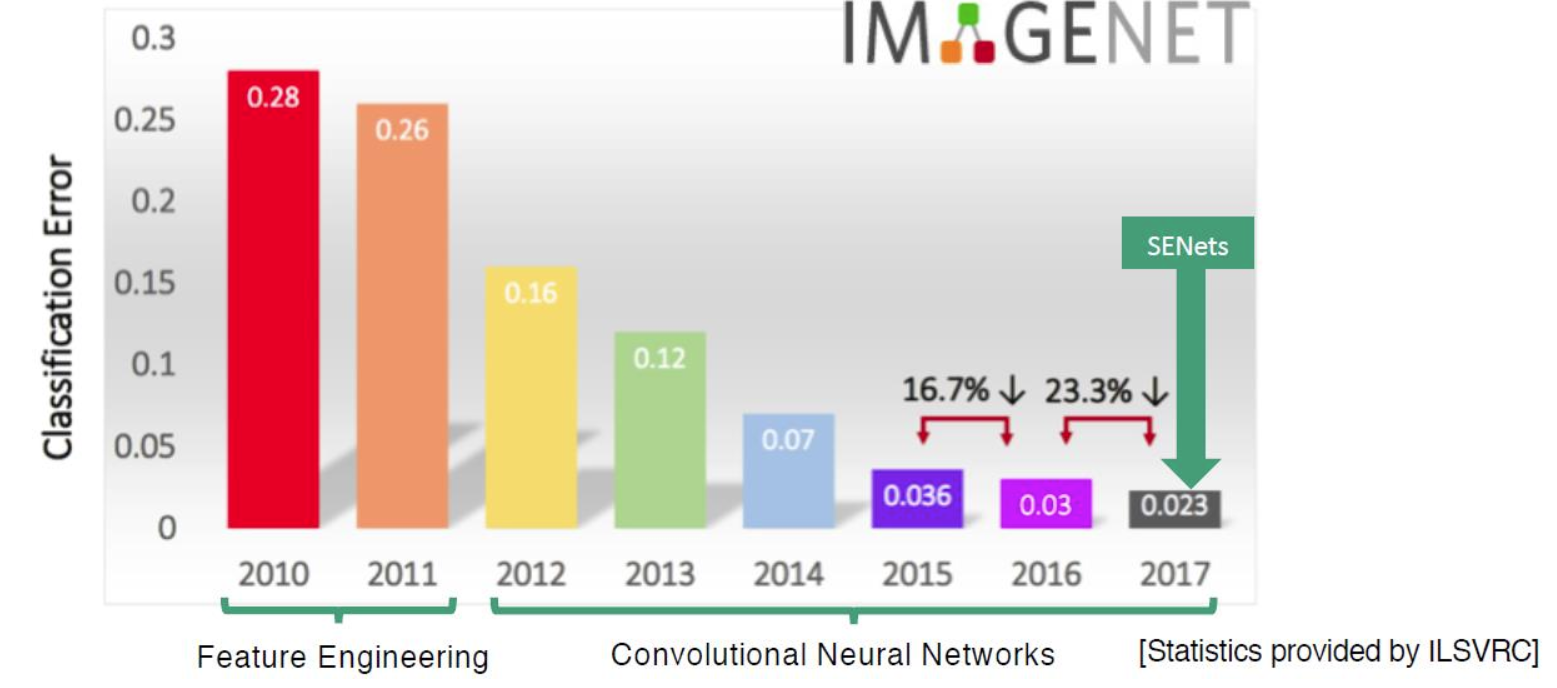

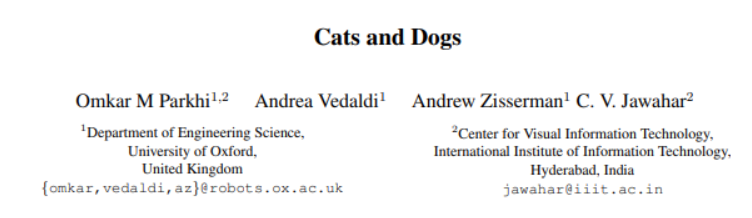

https://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf

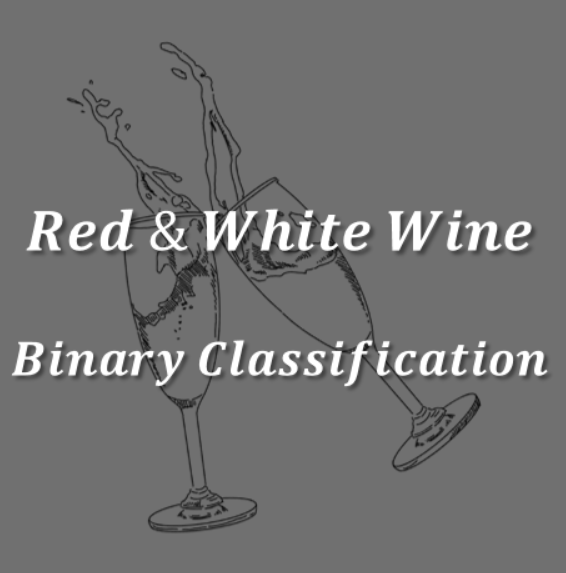

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [36]:
red = pd.read_csv('/content/winequality-red.csv', sep = ';')
white = pd.read_csv('/content/winequality-white.csv', sep = ';')
display(red.head())
display(white.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [37]:
red['type'] = 0
white['type'] = 1

print(red.head(2))
print(white.head(2))

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]


In [38]:
wine = pd.concat([red,white])
display(wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


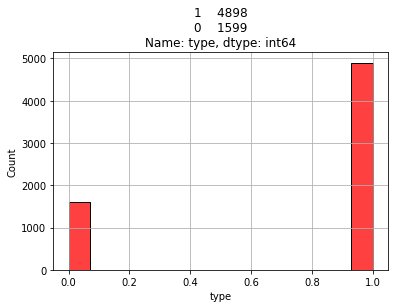

In [39]:
sns.histplot(wine['type'], color = 'red')
plt.title('{}'.format(wine['type'].value_counts()))

plt.grid()
plt.show()

In [40]:
wine[:20]
# 값이 일정하지 않아서 셔플을 진행을 해준다.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


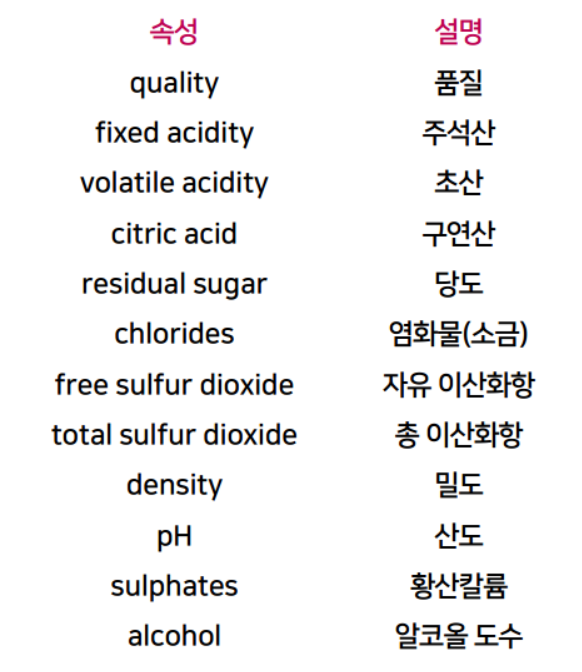

In [41]:
wine_shuffle = wine.sample(frac=1)
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
2280            6.4              0.16         0.25  ...     10.2        6     1
3022            8.0              0.74         0.21  ...      9.7        5     1
1237            7.1              0.75         0.01  ...     12.8        6     0
1340            7.2              0.16         0.32  ...     10.0        6     1
2978            6.6              0.23         0.20  ...      9.7        6     1

[5 rows x 13 columns]


In [42]:
wine_np = wine_shuffle.to_numpy()
print(type(wine_np))

<class 'numpy.ndarray'>


In [43]:
train_ratio = 0.8

print("Total Dataset Index",len(wine_np))
test_begin_index = int(len(wine_np) * train_ratio)
print("test_begin_index : ", test_begin_index)

Total Dataset Index 6497
test_begin_index :  5197


In [57]:
train_X, train_Y =  wine_np[ :test_begin_index , : -1], wine_np[ : test_begin_index, -1]
test_X, test_Y   =  wine_np[ test_begin_index: , : -1], wine_np[ test_begin_index: , -1]

In [65]:
train_X, train_Y =  wine_np[ :test_begin_index , : -1], wine_np[ : test_begin_index, -1 : ]
test_X, test_Y   =  wine_np[ test_begin_index: , : -1], wine_np[ test_begin_index: , -1 : ]

In [66]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [67]:
train_X[0]

array([6.400e+00, 1.600e-01, 2.500e-01, 1.300e+00, 4.700e-02, 2.000e+01,
       7.700e+01, 9.933e-01, 3.610e+00, 5.400e-01, 1.020e+01, 6.000e+00])

In [68]:
train_Y[:10]

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

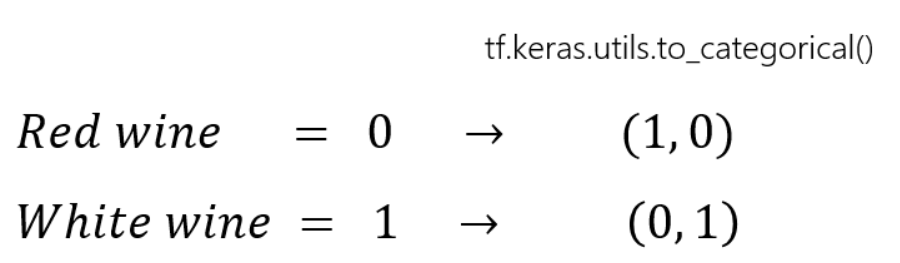

In [48]:
print("\nBefore - to_categorical : \n")
print(train_Y[0])
print(train_Y[1])
print(train_Y[2])

# 원핫벡터 처리를 한번 더해준다.
train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y_to_categorical  = tf.keras.utils.to_categorical(test_Y, num_classes  = 2)  

train_Y_to_categorical_5 = tf.keras.utils.to_categorical(train_Y, num_classes = 5)

print("\nAfter - to_categorical : \n")
print(train_Y_to_categorical[0])
print(train_Y_to_categorical[1])
print(train_Y_to_categorical[2])

print("\nAfter - to_categorical_5 : \n")
print(train_Y_to_categorical_5[:3])


Before - to_categorical : 

1.0
1.0
0.0

After - to_categorical : 

[0. 1.]
[0. 1.]
[1. 0.]

After - to_categorical_5 : 

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


신경망 만들기

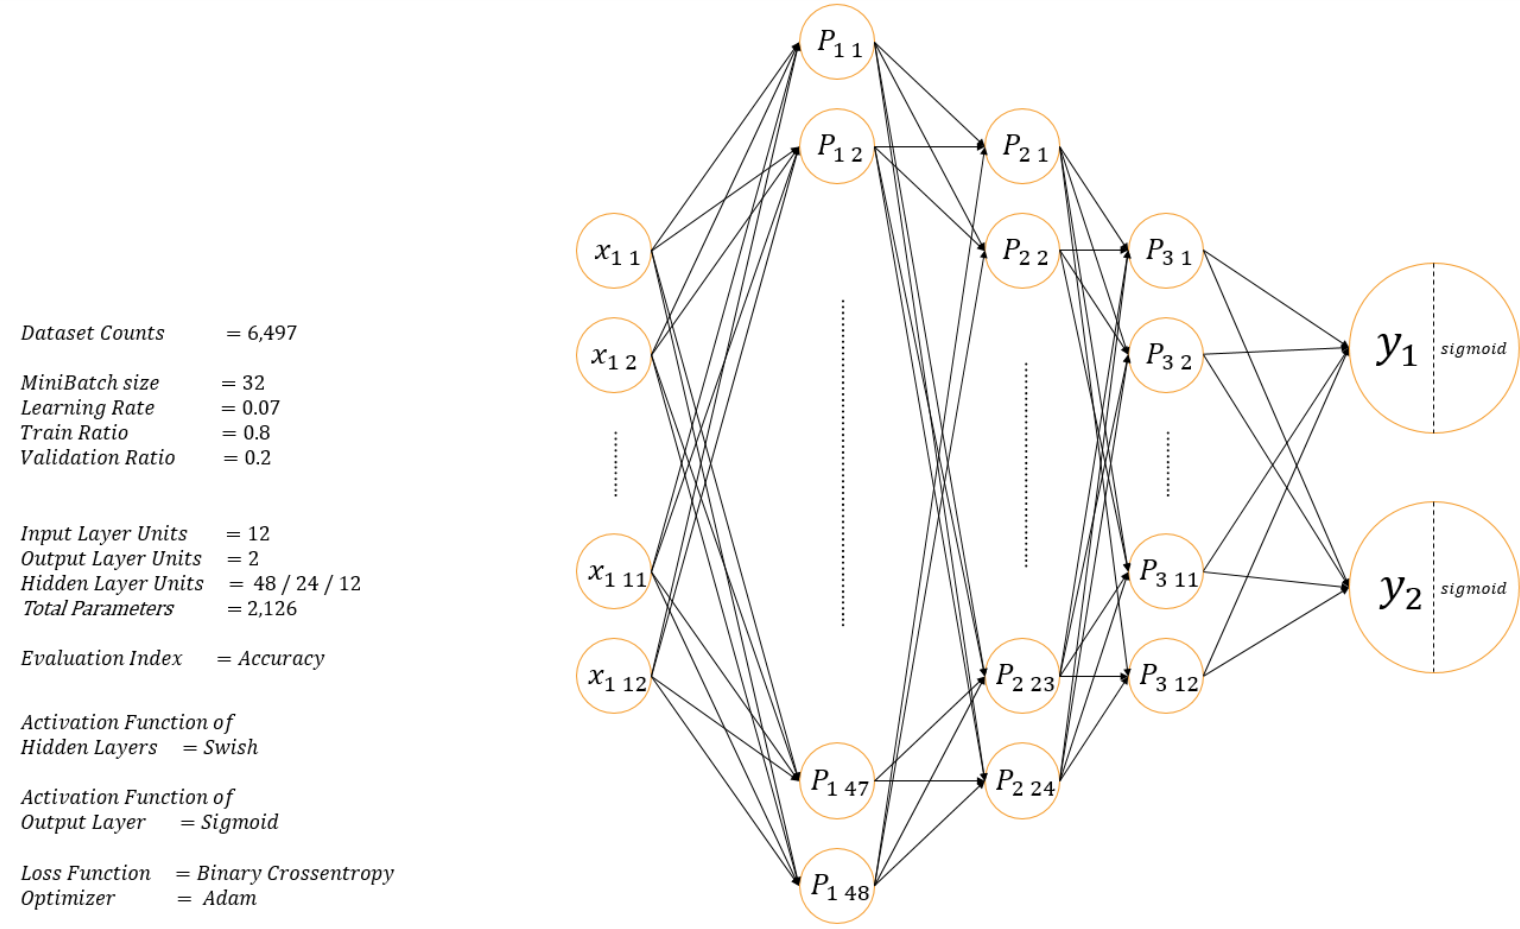

In [69]:
model_swish_sigmoid = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape = (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units=2, activation='sigmoid')
])

In [71]:
model_swish_sigmoid_no_onehot = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape = (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [53]:
model_swish_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                            loss = 'binary_crossentropy',
                            metrics = ['accuracy'])

In [72]:
model_swish_sigmoid_no_onehot.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                            loss = 'binary_crossentropy',
                            metrics = ['accuracy'])

In [73]:
model_swish_sigmoid_no_onehot.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_10 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 13        
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_swish_sigmoid.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [59]:
print(train_Y_to_categorical.shape)
print(test_Y_to_categorical.shape)

(5197, 2)
(1300, 2)


In [56]:
history = model_swish_sigmoid.fit(train_X, train_Y_to_categorical,
                                 epochs = 25, batch_size = 32, validation_split = 0.2,
                                 callbacks = [tf.keras.callbacks.EarlyStopping(patience=3,
                                                                      monitor = 'val_loss')])

Epoch 1/25
130/130 [==============================] - 1s 4ms/step - loss: 1.0453 - accuracy: 0.8980 - val_loss: 0.2194 - val_accuracy: 0.9250
Epoch 2/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9300 - val_loss: 0.1759 - val_accuracy: 0.9404
Epoch 3/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9346 - val_loss: 0.1791 - val_accuracy: 0.9462
Epoch 4/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9418 - val_loss: 0.1311 - val_accuracy: 0.9587
Epoch 5/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.9574 - val_loss: 0.1000 - val_accuracy: 0.9654
Epoch 6/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9452 - val_loss: 0.1409 - val_accuracy: 0.9654
Epoch 7/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9375 - val_loss: 0.3805 - val_accuracy: 0.8587
Epoch 

In [74]:
history = model_swish_sigmoid_no_onehot.fit(train_X, train_Y,
                                 epochs = 25, batch_size = 32, validation_split = 0.2,
                                 callbacks = [tf.keras.callbacks.EarlyStopping(patience=3,
                                                                      monitor = 'val_loss')])

Epoch 1/25
130/130 [==============================] - 1s 4ms/step - loss: 0.3062 - accuracy: 0.9028 - val_loss: 0.2236 - val_accuracy: 0.9173
Epoch 2/25
130/130 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9288 - val_loss: 0.1698 - val_accuracy: 0.9452
Epoch 3/25
130/130 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9254 - val_loss: 0.2220 - val_accuracy: 0.9433
Epoch 4/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9322 - val_loss: 0.2850 - val_accuracy: 0.9413
Epoch 5/25
130/130 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9298 - val_loss: 0.4212 - val_accuracy: 0.8875


In [60]:
model_swish_sigmoid.evaluate(test_X,test_Y_to_categorical)

41/41 [==============================] - 0s 1ms/step - loss: 0.1421 - accuracy: 0.9500


[0.14208029210567474, 0.949999988079071]

In [75]:
pred_Y = model_swish_sigmoid_no_onehot.predict(test_X)
print(np.round(pred_Y[:20],2))

[[0.4 ]
 [1.  ]
 [1.  ]
 [0.59]
 [0.05]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.05]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.3 ]
 [0.29]
 [0.99]
 [0.05]]


In [62]:
pred_Y = model_swish_sigmoid.predict(test_X)
print(np.round(pred_Y[:20],2))

[[0.95 0.06]
 [0.01 0.99]
 [0.02 0.98]
 [0.96 0.05]
 [0.95 0.06]
 [0.02 0.99]
 [0.09 0.91]
 [0.01 0.99]
 [0.01 0.99]
 [0.94 0.07]
 [0.01 1.  ]
 [0.   1.  ]
 [0.25 0.74]
 [0.   1.  ]
 [0.03 0.98]
 [0.01 1.  ]
 [0.94 0.07]
 [0.94 0.07]
 [0.19 0.81]
 [0.94 0.07]]


In [76]:
print(np.round(pred_Y[:10])) # 예측값

[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [77]:
print(test_Y[:10]) # 실제값

[0. 1. 1. 0. 0. 1. 1. 1. 1. 0.]


# MSE
실제값 0 | 1 
예측값 0 | 0
MSE -  0 | 1 

이진분류는 mse을 쓸 수 없다, 다른방식이 필요

# 확률 분포
확률분포값이 생겨났기때문에 학습할 것이 생겨남 (cross_entrophy)

In [64]:
test_Y_to_categorical[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [84]:
# 시각화
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss = history.history['loss']

In [85]:
val_accuracy # epoch값에 따른 검증데이터에 대한 정확도

[0.9173076748847961,
 0.9451923370361328,
 0.9432692527770996,
 0.9413461685180664,
 0.887499988079071]

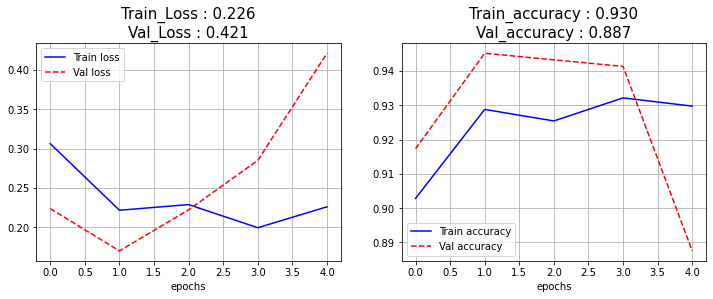

In [86]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], 'b-', label = 'Train loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val loss')
plt.xlabel('epochs')

plt.title('Train_Loss : {:.3f}\nVal_Loss : {:.3f}'.\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'Val accuracy')
plt.xlabel('epochs')

plt.title('Train_accuracy : {:.3f}\nVal_accuracy : {:.3f}'.\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.legend()
plt.grid()
plt.show()

In [83]:
model_swish_sigmoid_no_onehot.save('model_swish_sigmoid_no_onehot')


INFO:tensorflow:Assets written to: model_swish_sigmoid_no_onehot/assets


###### 만약에 ~ 신경망이 모든 결과를 1(화이트와인)으로 예측을 했습니다. --> 좋지않은 결과

###### 데이터의 비율이 레드(0)는 25% / 화이트(1)는 75%의 비중 --> 정확도 : 75%의 정확도 --> accuracy만 보면 75%니까 나쁘지않게보임,안좋다


###### 이를 해결하기 위해선 평가지표를 바꾼다. (accuracy대신) -> f1 score